Given the root of a complete binary tree, return the number of the nodes in the tree.

According to Wikipedia, every level, except possibly the last, is completely filled in a complete binary tree, and all nodes in the last level are as far left as possible. It can have between 1 and 2h nodes inclusive at the last level h.

Design an algorithm that runs in less than O(n) time complexity.

## Example 1:

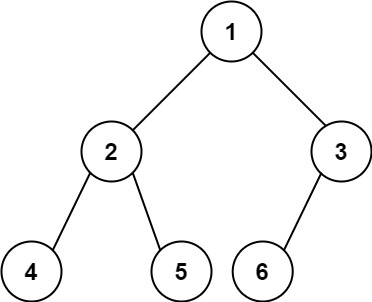

__Input__: root = [1,2,3,4,5,6]  
__Output__: 6


## Example 2:

__Input__: root = []  
__Output__: 0


## Example 3:

__Input__: root = [1]  
__Output__: 1

In [2]:
class Solution:
    def countNodes(self, root):
        return 1 + self.countNodes(root.right) + self.countNodes(root.left) if root else 0

In [3]:
class Solution:
    def compute_depth(self, node):
        """
        Return tree depth in O(d) time.
        """
        d = 0
        while node.left:
            node = node.left
            d += 1
        return d

    def exists(self, idx, d, node):
        """
        Last level nodes are enumerated from 0 to 2**d - 1 (left -> right).
        Return True if last level node idx exists. 
        Binary search with O(d) complexity.
        """
        left, right = 0, 2**d - 1
        for _ in range(d):
            pivot = left + (right - left) // 2
            if idx <= pivot:
                node = node.left
                right = pivot
            else:
                node = node.right
                left = pivot + 1
        return node is not None
        
    def countNodes(self, root):
        # if the tree is empty
        if not root:
            return 0
        
        d = self.compute_depth(root)
        # if the tree contains 1 node
        if d == 0:
            return 1
        
        # Last level nodes are enumerated from 0 to 2**d - 1 (left -> right).
        # Perform binary search to check how many nodes exist.
        left, right = 1, 2**d - 1
        while left <= right:
            pivot = left + (right - left) // 2
            if self.exists(pivot, d, root):
                left = pivot + 1
            else:
                right = pivot - 1
        
        # The tree contains 2**d - 1 nodes on the first (d - 1) levels
        # and left nodes on the last level.
        return (2**d - 1) + left